In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import g3py as g3
import pymc3 as pm
import emcee
import matplotlib.pyplot as plt
import time
import nglib.traces as tr
import pickle
import seaborn as sns
import time
import scipy as sp
from jupyterthemes.stylefx import set_nb_theme
import sklearn as sk
from sklearn.neighbors.kde import KernelDensity

g3.style_seaborn()
g3.style_widget()
#['grade3', 'onedork', 'monokai', 'oceans16', 'solarized-light', 'chesterish']
#set_nb_theme('grade3') 

In [2]:
x, y = g3.data_sunspots()
obs_j = np.array([6,   8,   9,  13,  14,  15,  17,  22,  23,  24,  25,  31,  32,
                  44,  46,  49,  60,  61,  62,  65,  67,  68,  69,  70,  73,  79,
                  81,  84,  87,  94,  97, 100, 104, 108, 113, 116, 117, 128, 133,
                  142, 144, 153, 155, 159, 162, 164, 169, 174, 180, 181, 182, 188,
                  189, 192, 197, 210, 211, 218, 222, 225, 230, 232, 233, 234, 241,
                  252, 261, 267, 272, 277, 282, 287, 288, 290, 291, 296, 301])
x_obs, y_obs = x[obs_j], y[obs_j]
#obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.5, 0.5)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [3]:
gp = g3.TGP(x, g3.Bias(), g3.SM(), g3.BoxCoxShifted(), hidden=y)
gp.observed(x_obs, y_obs)

Space Dimension:  1
Init Definition
Latent OK
Prior OK
Posterior OK
Definition OK
Compilation OK


Starting function value (-logp): 392.519

start_bfgs
         Current function value: 358.230499
         Iterations: 19
         Function evaluations: 46
         Gradient evaluations: 34


{'TGP_Bias_Bias': array(13.513696670532227, dtype=float32),
 'TGP_BoxShift_power_log_': array(-0.5953810811042786, dtype=float32),
 'TGP_BoxShift_shift': array(10.373156547546387, dtype=float32),
 'TGP_Noise_var_log_': array(-13.81252670288086, dtype=float32),
 'TGP_SM_freq_log_': array([-5.68697548], dtype=float32),
 'TGP_SM_rate_log_': array([-2.29193091], dtype=float32),
 'TGP_SM_var_log_': array(3.4978699684143066, dtype=float32)}

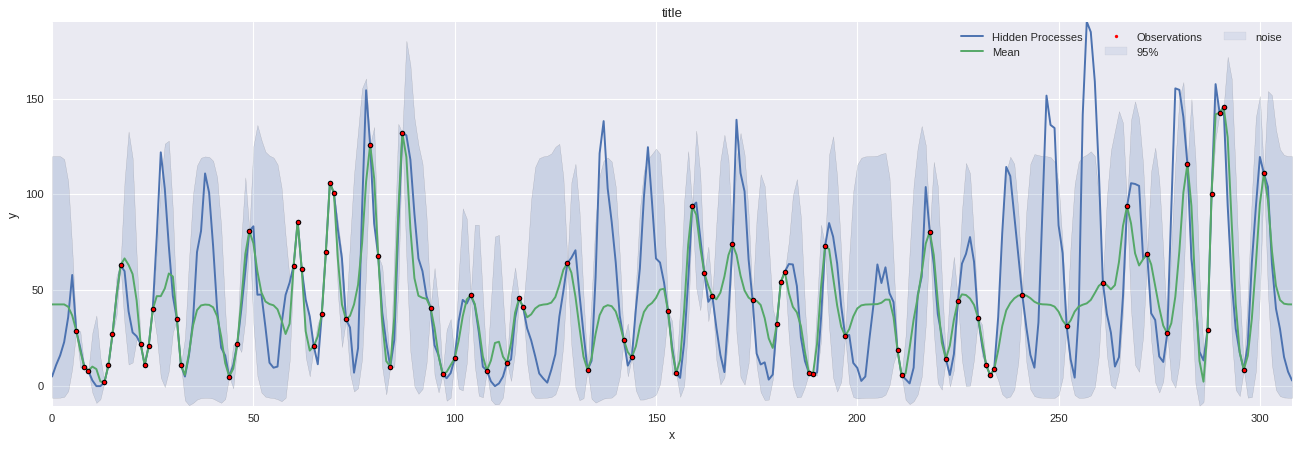

In [4]:
params = gp.find_MAP()
gp.plot(params)
params

In [12]:
dt = gp.ensemble_hypers(samples=2000, burnin_tol=0.001, ntemps=3)
_cluster = g3.cluster_datatrace(gp, dt)
kde = g3.datatrace_to_kde(gp, dt)

Starting function value (-logp): 392.519

start_bfgs
         Current function value: 358.230499
         Iterations: 19
         Function evaluations: 46
         Gradient evaluations: 34
Sampling 7 variables, 14 chains, 2000 times (3 temps)


100%|██████████| 2000/2000 [00:53<00:00, 37.55it/s]


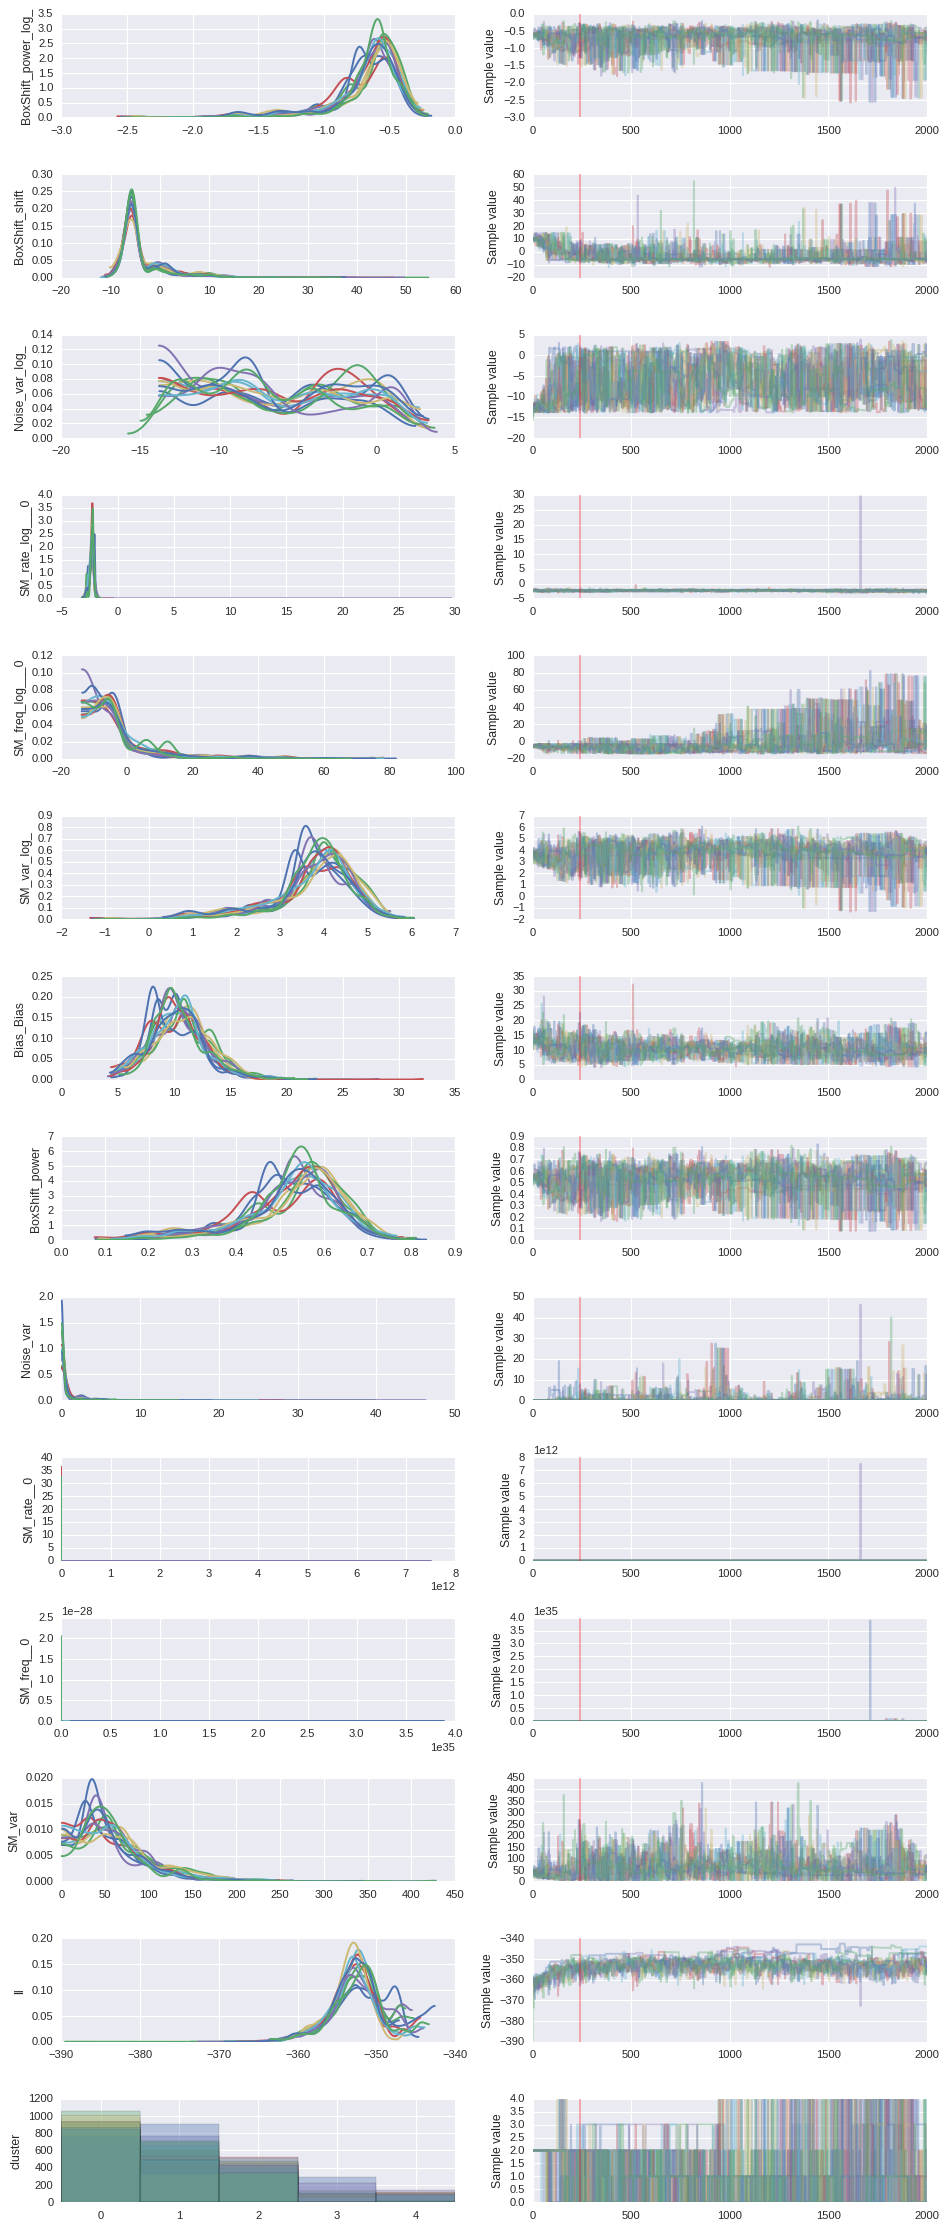

In [14]:
g3.plot_datatrace(dt)

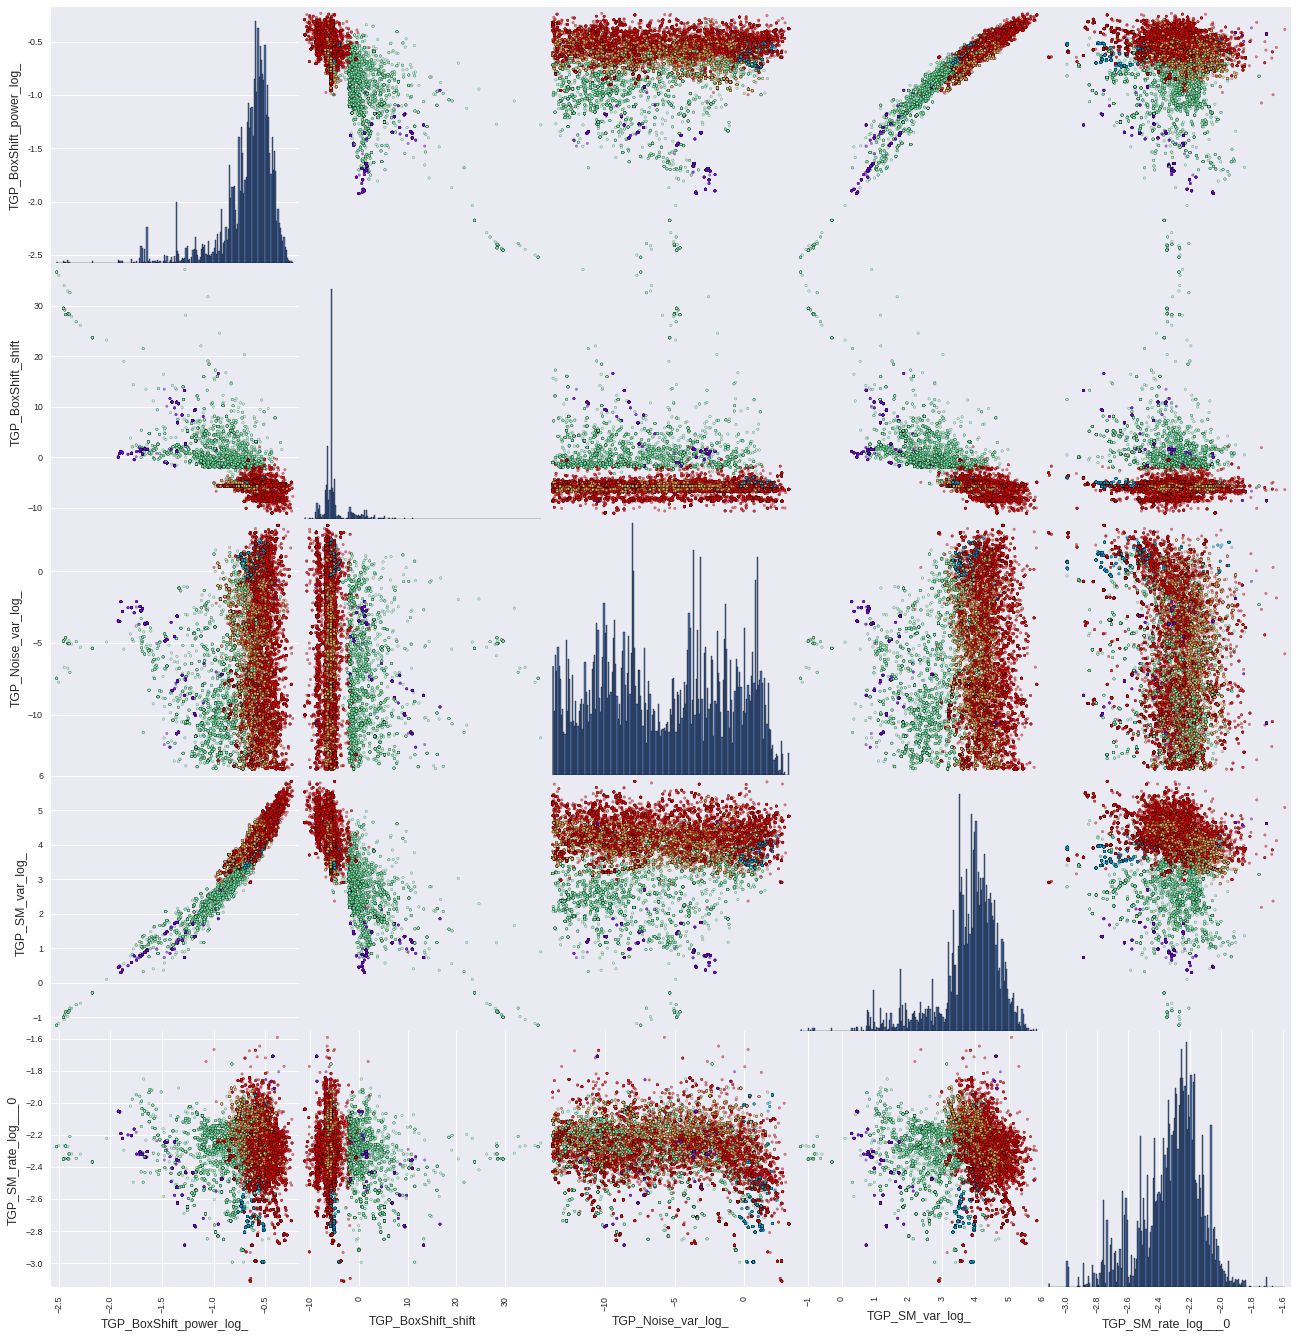

In [16]:
items = ['TGP_BoxShift_power_log_','TGP_BoxShift_shift','TGP_Noise_var_log_','TGP_SM_var_log_','TGP_SM_rate_log___0', 
         'TGP_SM_freq_log___0', '_ll', '_cluster']
items = ['TGP_BoxShift_power_log_','TGP_BoxShift_shift','TGP_Noise_var_log_','TGP_SM_var_log_','TGP_SM_rate_log___0']
g3.scatter_datatrace(dt, items=items, figsize=(20, 20))

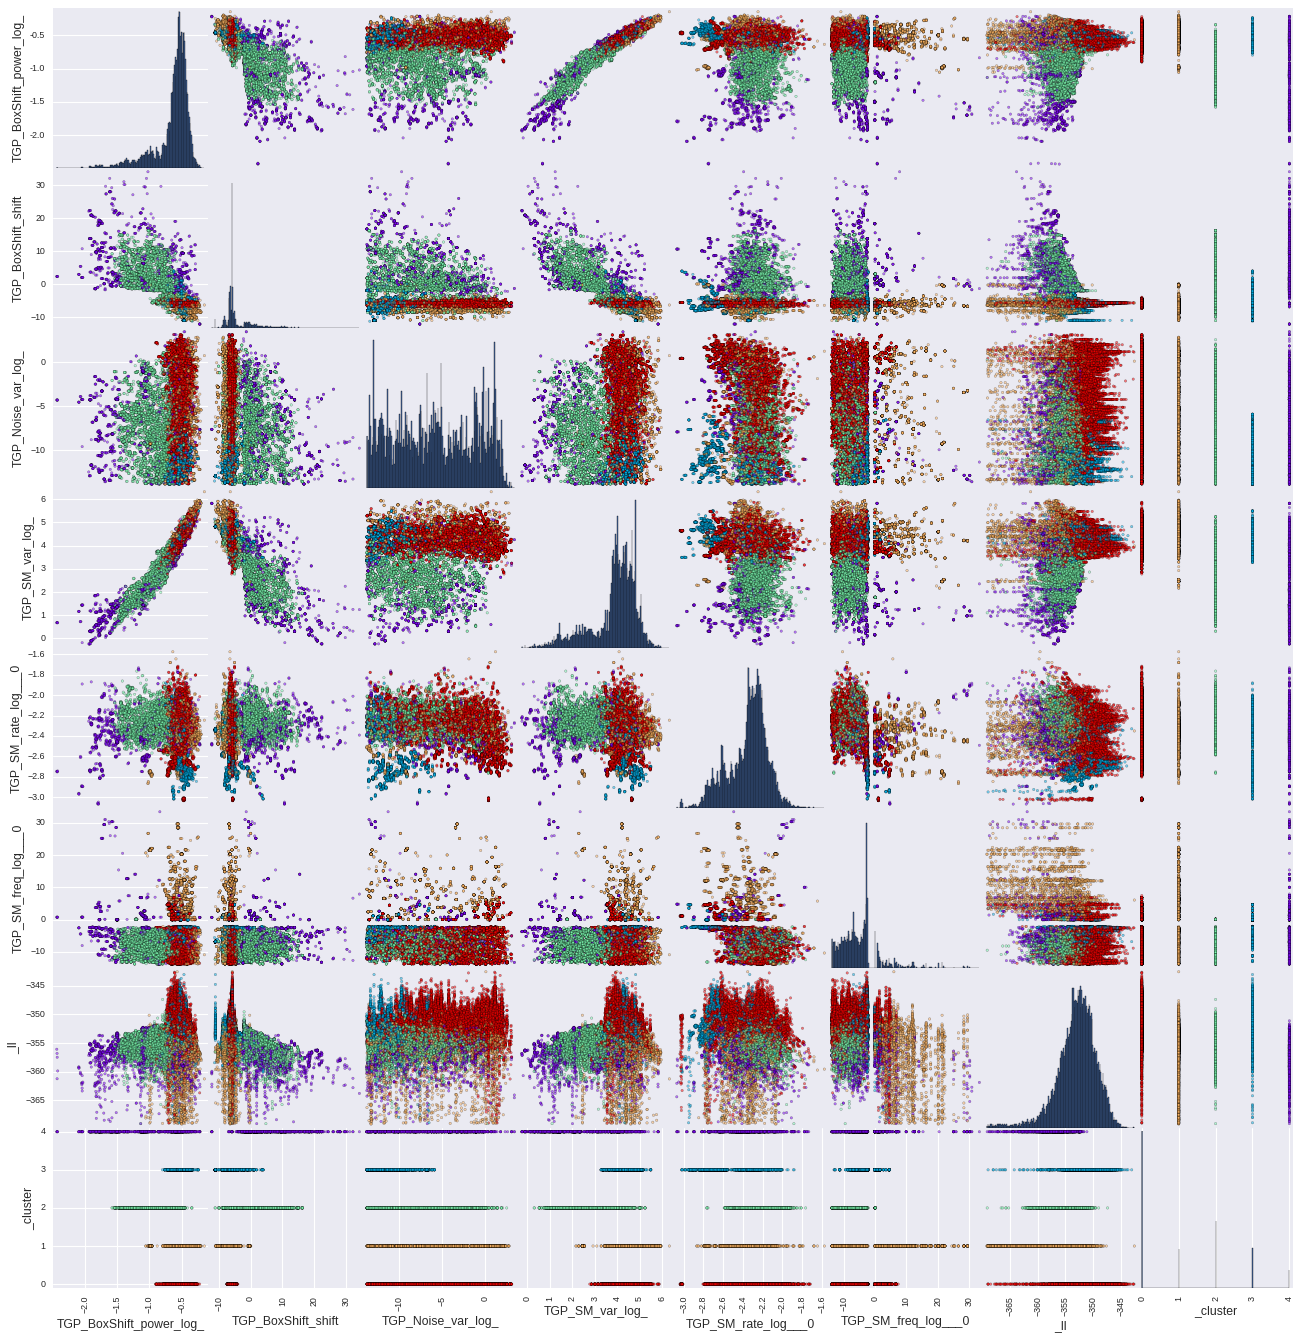

In [8]:
nsamples = 28000

new_dt = g3.kde_to_datatrace(gp, kde, nsamples)
g3.scatter_datatrace(new_dt, items=items, figsize=(20,20))

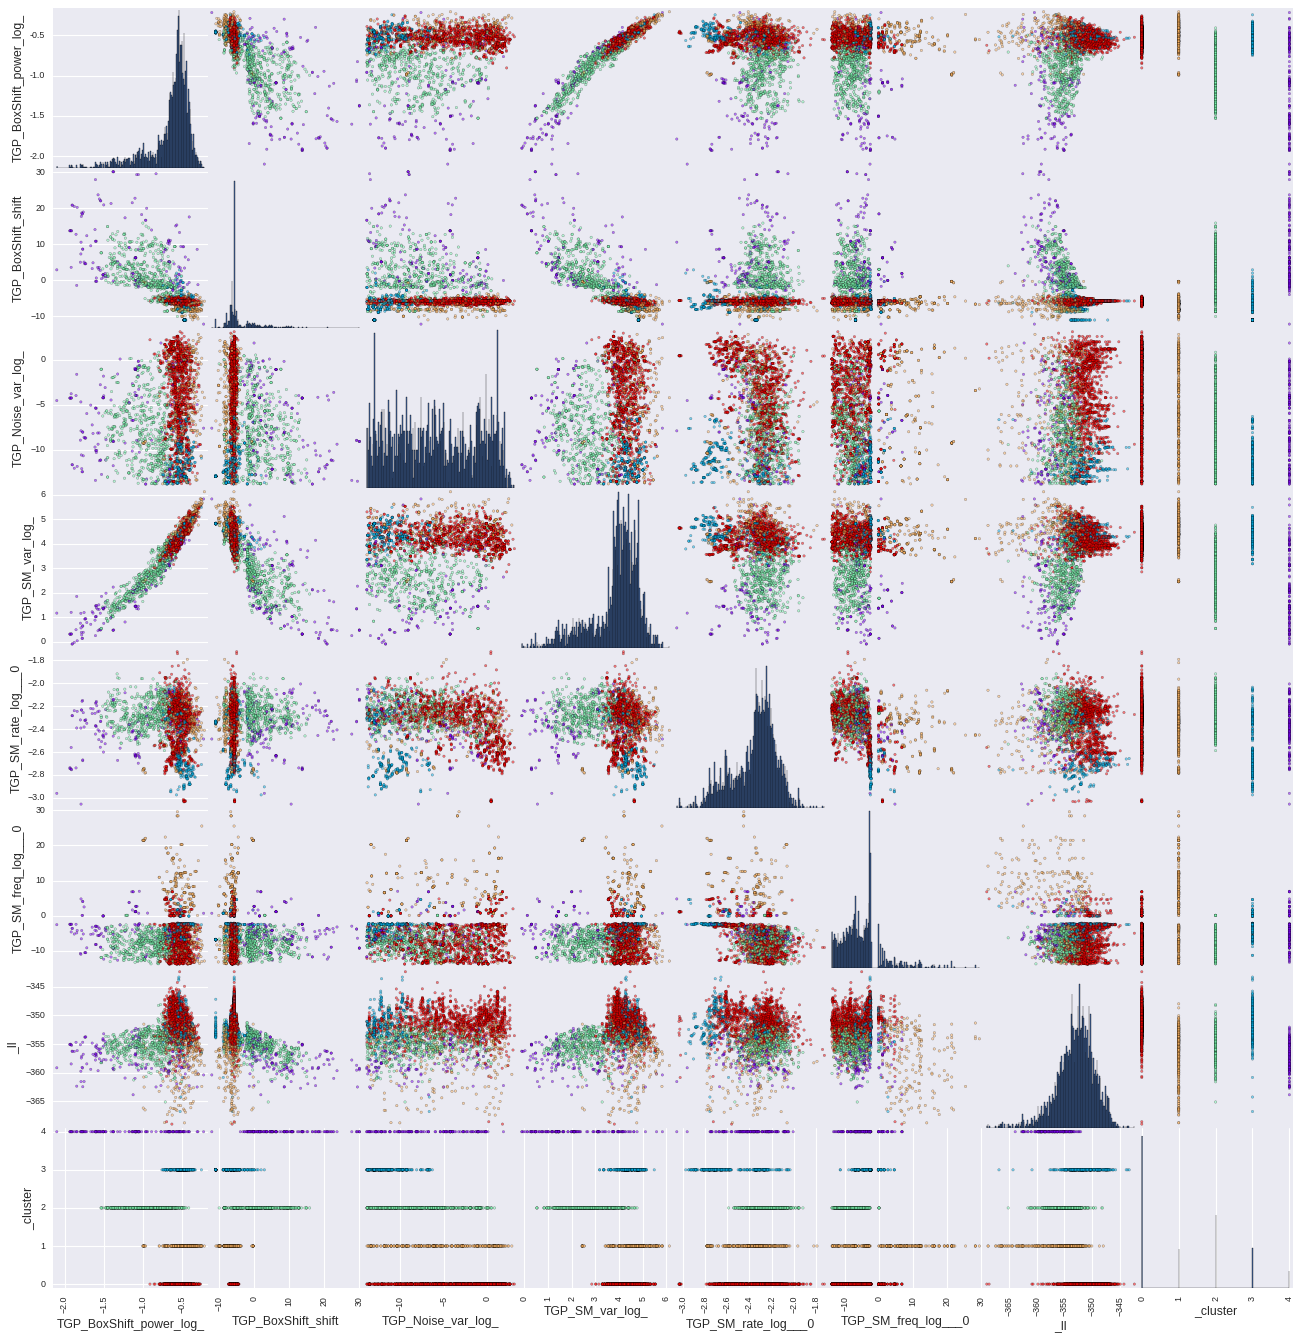

In [9]:
nsamples = 3000

new_dt = g3.kde_to_datatrace(gp, kde, nsamples)
g3.scatter_datatrace(new_dt, items=items, figsize=(20,20))

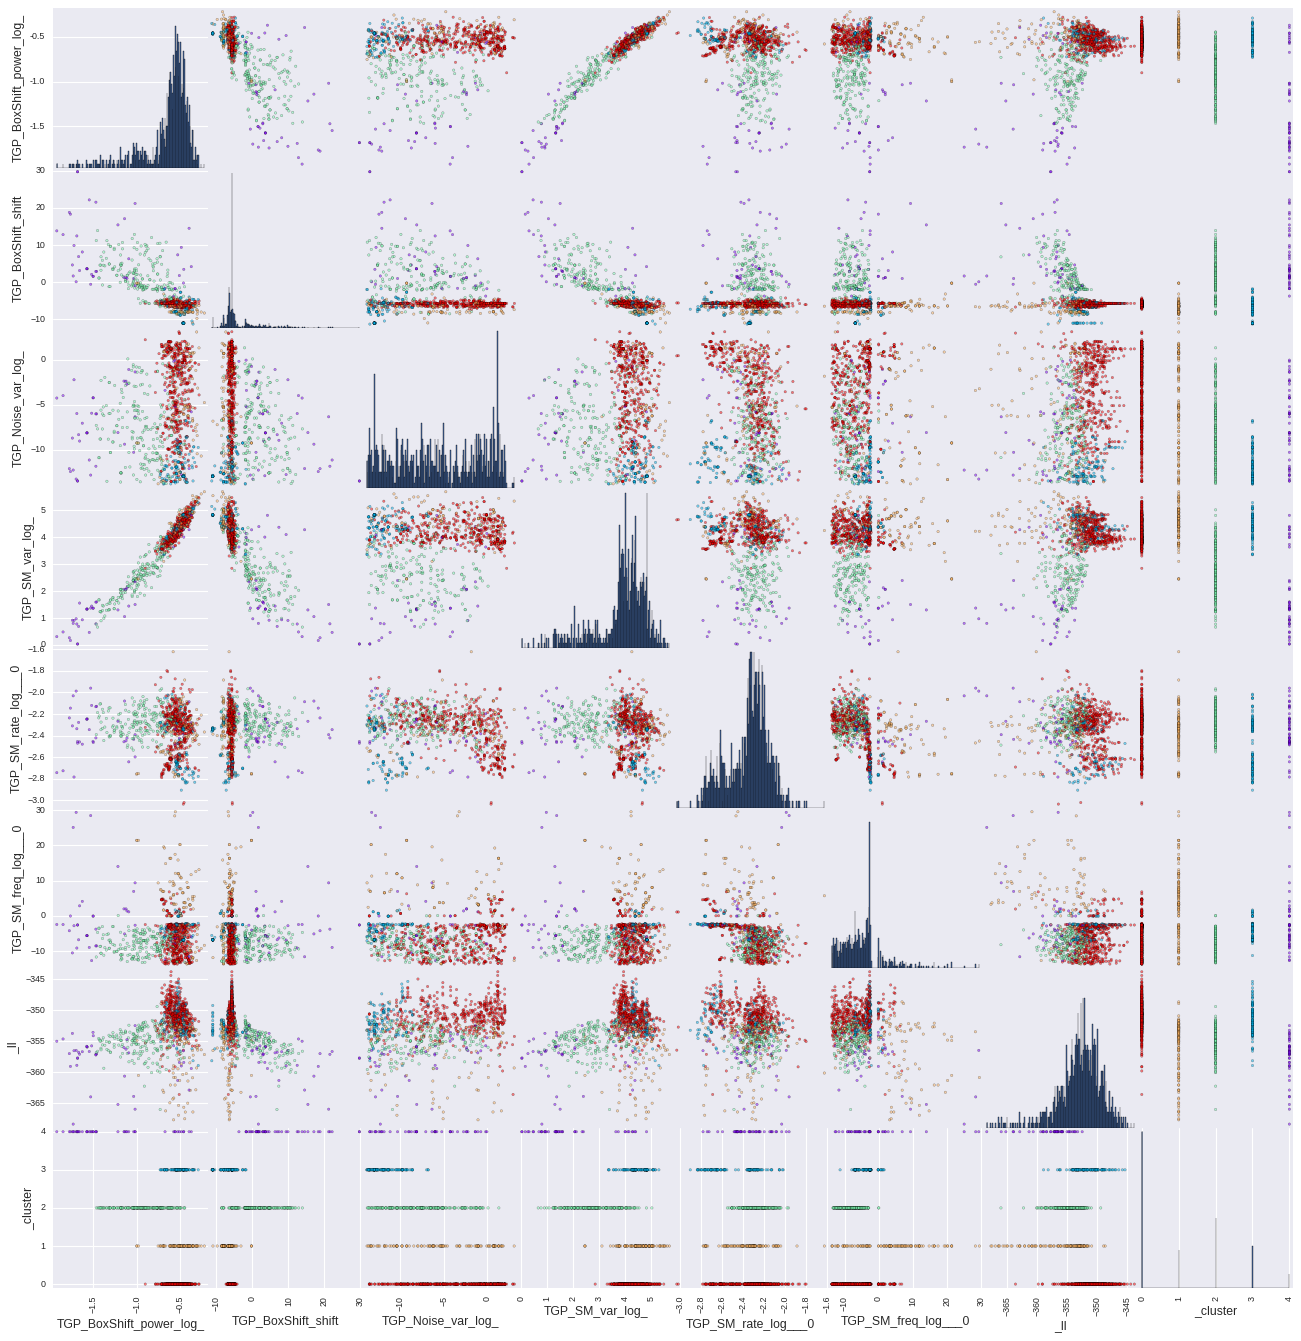

In [10]:
nsamples = 1000

new_dt = g3.kde_to_datatrace(gp, kde, nsamples)
g3.scatter_datatrace(new_dt, items=items, figsize=(20,20))

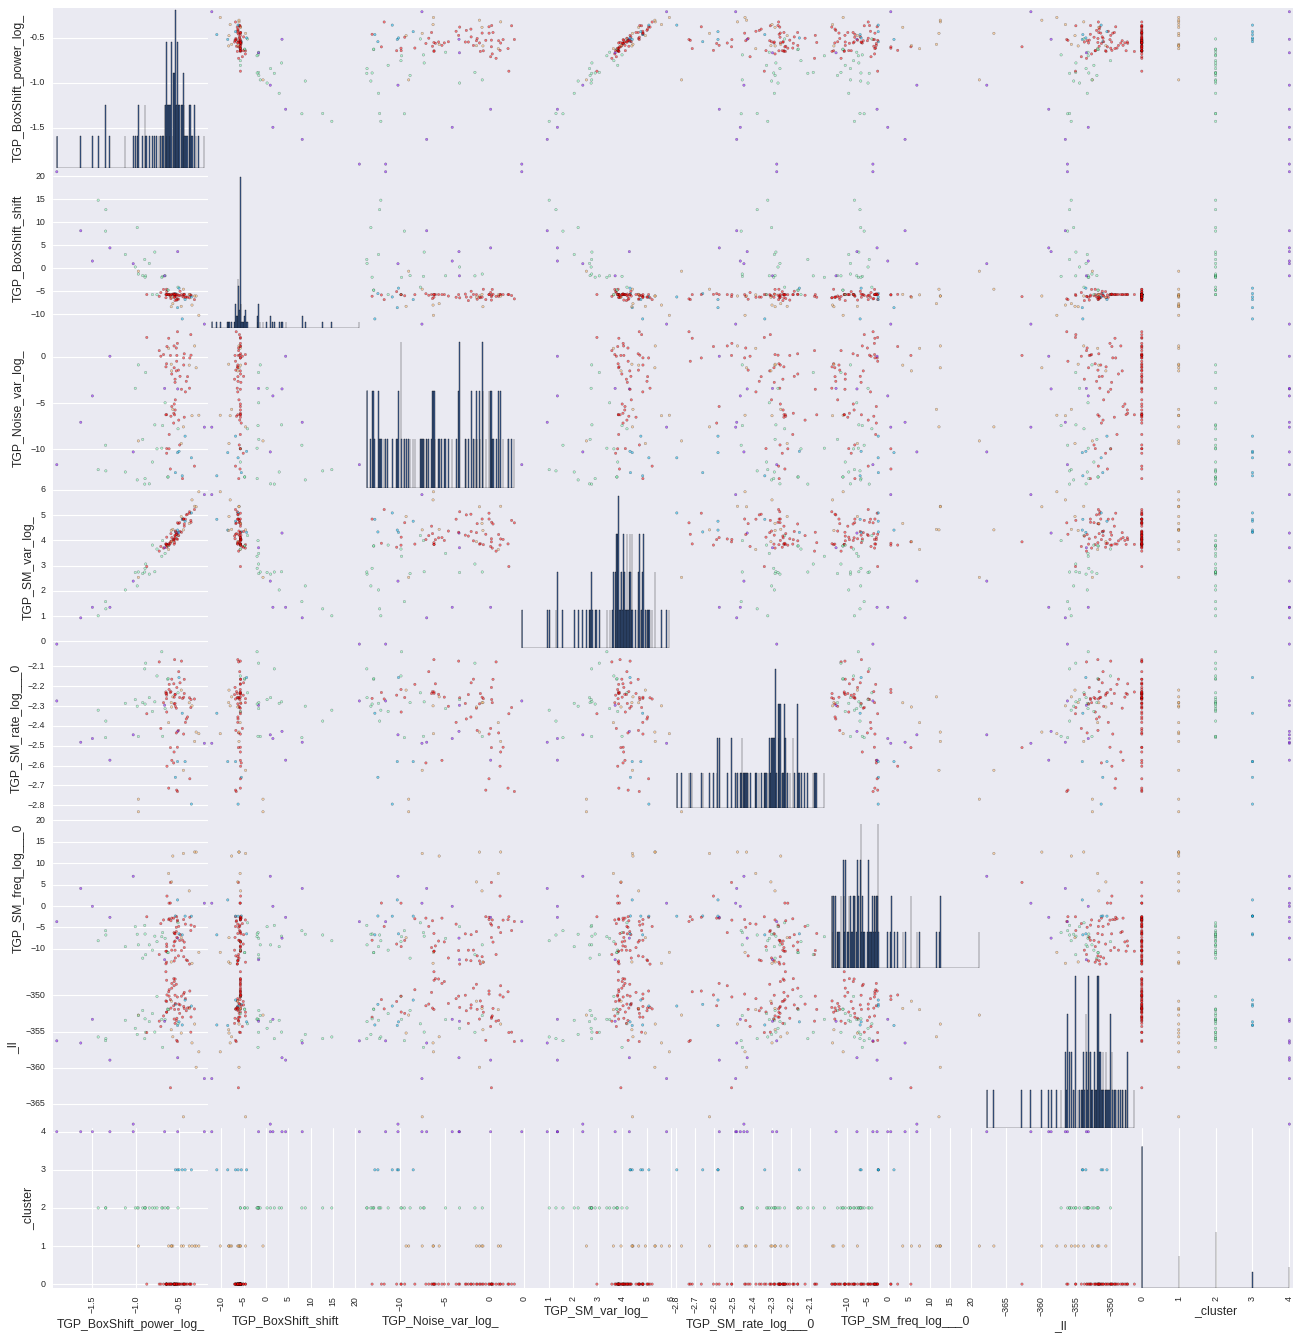

In [11]:
nsamples = 100

new_dt = g3.kde_to_datatrace(gp, kde, nsamples)
g3.scatter_datatrace(new_dt, items=items, figsize=(20,20))

In [87]:
g3.find_candidates(new_dt, ll=5)

TGP_BoxShift_power_log_  TGP_BoxShift_shift  TGP_Noise_var_log_  \
ll[66]                -0.588923           -6.295863           -1.512717   
ll[88]                -0.385741           -5.666016           -0.897577   
ll[38]                -0.622412           -5.760293            0.921371   
ll[14]                -0.968632           -0.644590           -9.077909   
ll[45]                -0.324562           -6.013060            1.182175   
ll[93]                -0.433420           -6.787035           -8.567758   
ll[10]                -0.544556           -5.487374          -12.506495   
ll[67]                -0.361246           -6.217467          -10.901931   
ll[80]                -0.503322           -4.314445          -10.209366   
ll[20]                -0.466074          -10.979027          -12.848107   
ll[56]                -0.653543           -5.697399           -6.255873   
ll[25]                -0.562834           -5.702429           -6.093049   
ll[43]                -0.547799           -5.693904           -5.739622   
ll[39]                -0.645324           -5.690365           -6.241939   
ll[98]                -0.558130           -5.703824           -5.096538   
ll[72]                -0.755581           -5.709988           -9.936297   
ll[48]                -0.633114           -4.745150          -12.982030   
ll[49]                -0.627541           -4.743169          -12.970329   
ll[5]                 -0.919562           -1.589863           -8.916458   
ll[76]                -0.807585           -5.703192          -11.361344   
ll[77]                -1.495380            1.565175           -4.217164   
ll[63]                -0.668022           -1.638242           -3.409957   
ll[83]                -1.903644           20.918158          -11.645393   
ll[40]                -1.629356            8.130930           -7.067717   
ll[31]                -0.518446            3.604091           -3.463811   

        TGP_SM_rate_log___0  TGP_SM_freq_log___0  TGP_SM_var_log_  \
ll[66]            -2.304872             5.624123         3.946273   
ll[88]            -2.283434             3.527995         4.666576   
ll[38]            -2.383686             7.594389         3.635946   
ll[14]            -2.769397            22.015151         2.534411   
ll[45]            -2.478378            12.609095         5.344553   
ll[93]            -2.579928            -2.372636         4.754381   
ll[10]            -2.659297            -2.342932         4.331590   
ll[67]            -2.794099            -2.387938         5.082977   
ll[80]            -2.156546            -6.501082         4.313042   
ll[20]            -2.336585            -6.742407         4.828840   
ll[56]            -2.229417           -10.574043         3.838516   
ll[25]            -2.188092            -9.325181         4.024418   
ll[43]            -2.241129            -8.195019         4.098734   
ll[39]            -2.236224           -10.562866         3.836229   
ll[98]            -2.255502            -8.392396         3.994191   
ll[72]            -2.148578            -8.332087         3.653628   
ll[48]            -2.165376           -10.886838         3.773004   
ll[49]            -2.162181           -10.898964         3.780850   
ll[5]             -2.282799           -12.196022         2.685617   
ll[76]            -2.327460           -10.327335         3.810271   
ll[77]            -2.463786            -0.081165         1.350018   
ll[63]            -2.296463           -12.550824         3.706512   
ll[83]            -2.274474            -3.663123        -0.105417   
ll[40]            -2.482560             4.093711         0.934584   
ll[31]            -2.427919            -7.509101         4.286596   

        TGP_Bias_Bias  TGP_BoxShift_power  TGP_Noise_var  TGP_SM_rate__0  \
ll[66]       8.672808            0.554925       0.220311        0.099772   
ll[88]      14.562493            0.679947       0.407556        0.101934   
ll[38]       8.761997            0

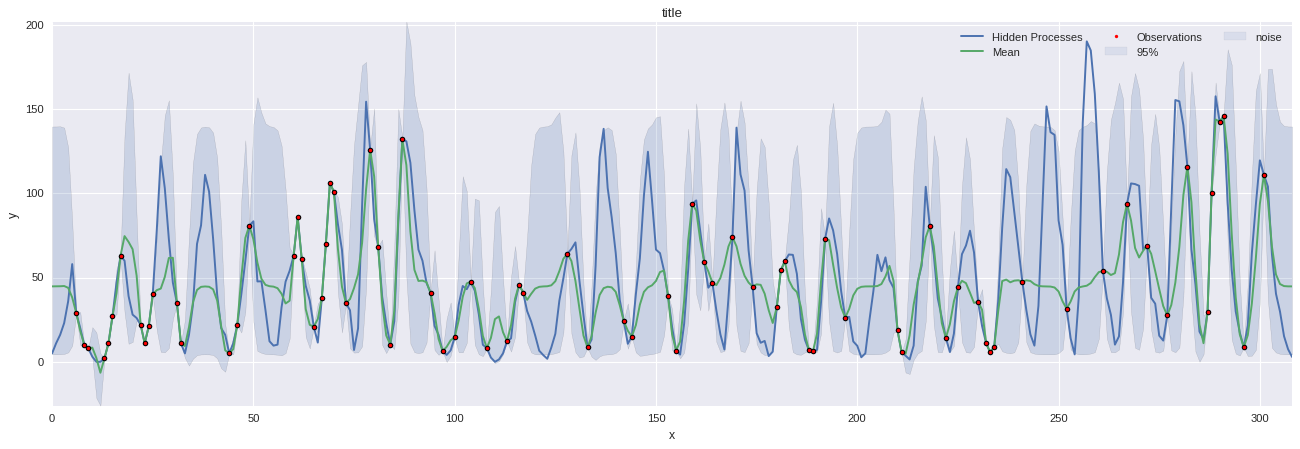

In [45]:
gp.plot(gp.get_params_datatrace(new_dt, int(g3.find_candidates(new_dt).index[0][3:-1])))

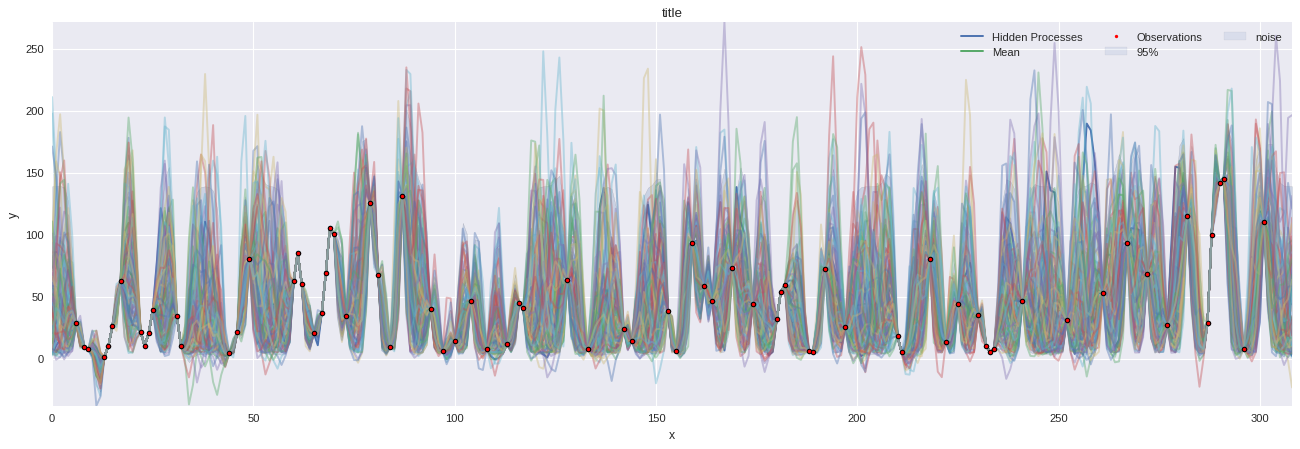

In [46]:
gp.plot(gp.get_params_datatrace(new_dt, int(g3.find_candidates(new_dt).index[0][3:-1])), samples=100)

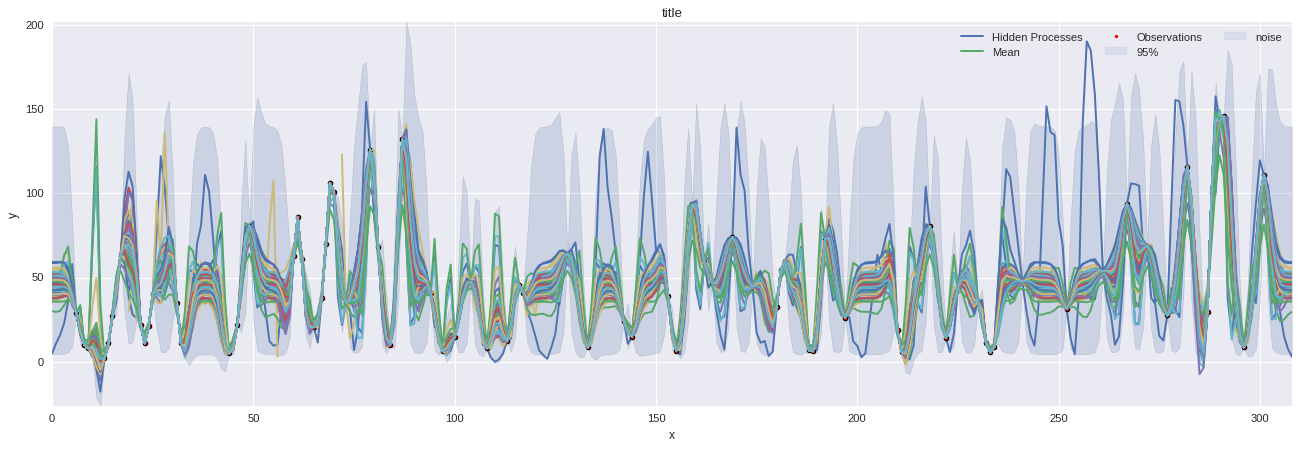

In [48]:
gp.plot(gp.get_params_datatrace(new_dt, int(g3.find_candidates(new_dt).index[0][3:-1])))
mean = 0
alpha = new_dt._ll.min()
w = np.log(np.exp(-new_dt._ll+alpha).sum())

predict = gp.predict(gp.get_params_datatrace(new_dt,0), var=False).mean
predict_stack = predict[None,:]
for i in range(len(new_dt)):
    predict = gp.predict(gp.get_params_datatrace(new_dt,i), var=False).mean
    predict_stack = np.vstack([predict_stack, predict])
    mean += predict*(np.exp(-new_dt.loc[i]._ll+alpha-w))
    plt.plot(predict)

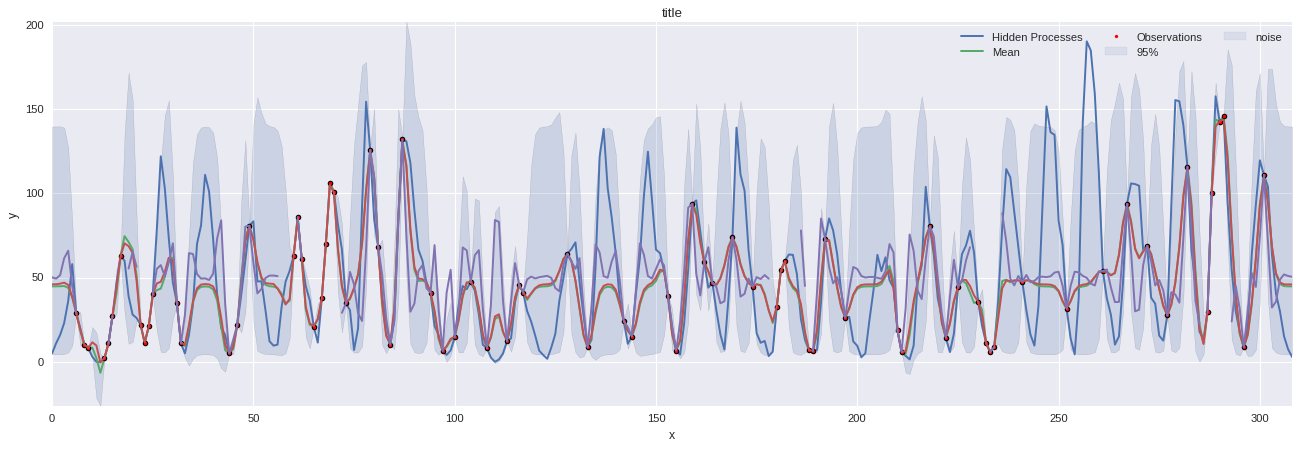

In [54]:
gp.plot(gp.get_params_datatrace(new_dt, int(g3.find_candidates(new_dt).index[0][3:-1])))
_ = plt.plot(np.nanmean(predict_stack, axis=0))
plt.plot(mean)

In [51]:
mean

array([  50.14491272,   49.40107346,   51.44885254,   61.47505951,
         65.94612885,   45.00852585,   29.00397873,           nan,
                 nan,    8.00299358,           nan,  135.77392578,
                 nan,           nan,   10.99982166,   27.0059433 ,
                 nan,           nan,           nan,   55.3430748 ,
         65.16983795,   56.3708992 ,           nan,   11.00333214,
                 nan,   40.0013504 ,   55.11090469,   57.41141891,
         50.70401001,   59.08620453,   70.36779022,   34.99871826,
         11.00389099,   27.88180733,   64.53234863,   63.97874069,
         52.11716461,   49.38870621,   49.55190659,   48.57341766,
         52.28489304,   73.18524933,   83.99794006,   34.32471466,
          5.00112295,   13.21184349,   22.00411415,   45.11244202,
         80.2008667 ,   80.89503479,   58.87008667,   40.61741257,
         43.22982788,   49.75541687,   51.18706894,   51.22607422,
         50.85480118,           nan,           nan,           